# Basler camera image adjustment specs.
source: https://docs.baslerweb.com/

Camera Model : acA2440-35uc 5M 30fps
## List of features
*  [Acquisition Frame Rate (How to increase frame rate)](#Acquisition-Frame-Rate) 
*  [Image format (Mono and color)](#Image-format)
*  [Gamma (Brightness change)](#Gamma)
*  [ROIs (ROI for compute gamma and other applications)](#ROIs)
*  [Auto Gain](#Auto-Gain)
*  [Auto White Balance](#Auto-White-Balance)
*  [Light Source Preset](#Light-Source-Preset)
*  [Frame Size](#Frame-Size)

Intelligent boards company, Kerman, Iran
Written by Nima Torbati 2023

### start camera

In [11]:
# this cell starts camera module
from pypylon import pylon
from pypylon import genicam
import numpy as np
import keyboard  # using module keyboard
from time import sleep
from matplotlib import pyplot as plt
import cv2
#init camera
cam = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())# camera object defined by the pylon module



### Acquisition Frame Rate

The Acquisition Frame Rate camera feature allows you to set an upper limit for the camera's frame rate. For this purpose, we should first change the image size and select a ROI of each frame. 



In [12]:
cam.StopGrabbing()
cam.Close()
cam.Open()
maxWidth = cam.WidthMax.GetValue()#maximum width
cam.Width.SetValue(2456)# frame width is set equal to 2456
cam.Height.SetValue(500)# frame height is equal to 500
cam.OffsetX.SetValue(0)# This parameter defines the starting pixel of ROI in x-axis
cam.OffsetY.SetValue(800)# this parameter defines the starting pixel of ROI in y-axis

#print(cam.ExposureTime.Value)

cam.ExposureMode.SetValue("Timed")
cam.ExposureAuto.SetValue("Off")
#cam.ExposureTimeMode.SetValue("UltraShort")# not available
cam.ExposureTime.SetValue(10000.0)# the exposure time to capture the frame, the lowe0r the value the higher the frame rate,
# please note that a very low exposure time results in a dark frame

cam.AcquisitionFrameRateEnable.SetValue(True)
cam.AcquisitionFrameRate.SetValue(100.0)
cam.StopGrabbing()
cam.Close()


#### Image format
Available image formats are listed below

black and white
1. MonoXX (e.g., Mono10, Mono12p) 

color 

2. BayerXXYY (e.g., BayerBG10, BayerGR12)
3. YCbCrXXX, YUVXXX
4. RGB8, BGR8

Mono8
current pixel format is:  Mono8
(500, 2456)


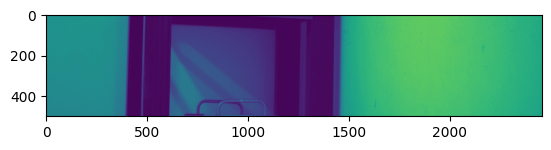

BayerRG8
current pixel format is:  BayerRG8
(500, 2456, 3)


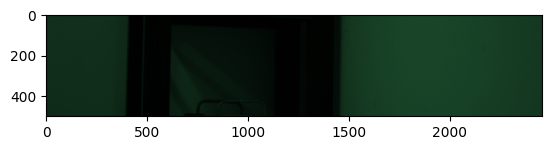

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


BayerRG12
current pixel format is:  BayerRG12
(500, 2456, 3)


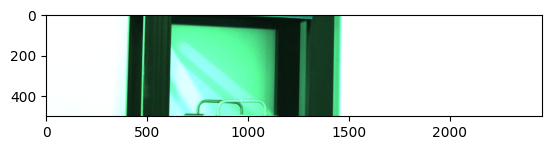

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


BayerRG12p
current pixel format is:  BayerRG12p
(500, 2456, 3)


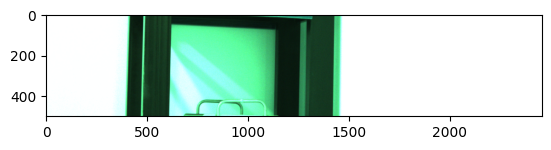

RGB8
current pixel format is:  RGB8
(500, 2456, 3)


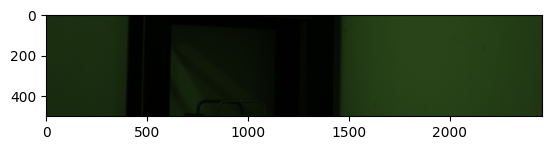

In [13]:
#print current format
cam.Open()
#print("current pixel format is: ", cam.PixelFormat.Value)
for fmt in [
    "Mono8",
    "BayerRG8",
    "BayerRG12",
    "BayerRG12p",
    "RGB8",
#    "BGR8",
#    "YCbCr422_8"
    ]:
    print(fmt)
    cam.PixelFormat.SetValue(fmt)
    sleep(0.01)
    print("current pixel format is: ", cam.PixelFormat.Value)
    cam.StartGrabbing()
    with cam.RetrieveResult(2000) as result:
            if result.GrabSucceeded():
#                print("new format")
                frame = result.GetArray()
                if (fmt == "BayerRG8")|(fmt == "BayerRG12")|(fmt == "BayerRG12p"):
                    frame = cv2.cvtColor(frame, cv2.COLOR_BayerRG2RGB)
                if (fmt == "YCbCr422_8"):
                    frame = cv2.cvtColor(frame, cv2.COLOR_YCrCb2RGB)
                print(np.shape(frame))
                plt.imshow(frame)
                plt.show()
                sleep(0.1)
            else:
                print("GrabFailed")        
    cam.StopGrabbing()
cam.PixelFormat.SetValue("RGB8")
cam.Close()


### Gamma
Gamma controls the overall brigtness.
For this camera model, we can only change gamma value:

Set the Gamma parameter to the desired value. The parameter's value range is 0 to ≈4.

Gamma = 1: The overall brightness remains unchanged.

Gamma < 1: The overall brightness increases.

Gamma > 1: The overall brightness decreases.

We set it equal to 1

current Gamma is:  1.0
0.5
current Gamma is:  0.5
new Gamma
(500, 2456, 3)


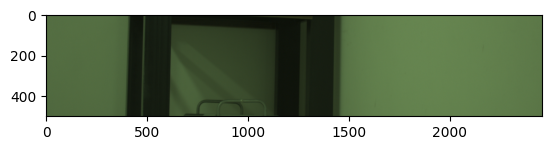

1
current Gamma is:  1.0
new Gamma
(500, 2456, 3)


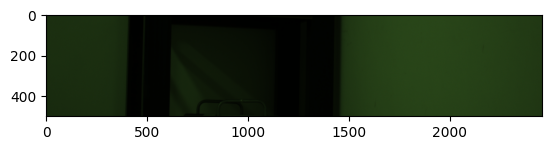

1.5
current Gamma is:  1.5
new Gamma
(500, 2456, 3)


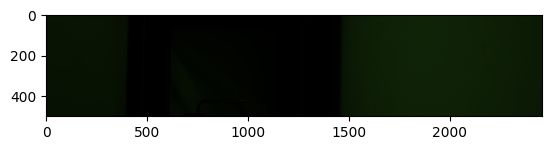

In [14]:
#print current format
cam.Open()
print("current Gamma is: ", cam.Gamma.Value)
for fmt in [
    0.5,
    1,
    1.5,
    ]:
    print(fmt)
    cam.Gamma.SetValue(fmt)
    sleep(0.01)
    print("current Gamma is: ", cam.Gamma.Value)
    cam.StartGrabbing()
    with cam.RetrieveResult(2000) as result:
            if result.GrabSucceeded():
                print("new Gamma")
                frame = result.GetArray()
#                frame = cv2.cvtColor(frame, cv2.COLOR_BayerRG2RGB)
                print(np.shape(frame))
                plt.imshow(frame)
                plt.show()
                sleep(0.1)
            else:
                print("GrabFailed")        
    cam.StopGrabbing()
cam.Gamma.SetValue(1)
cam.Close()


### ROIs
ROIs are the coordinates of regions where the image parameters are estimated there.(For example an object of interst is in that region)
This basler camera has two ROIs: ROI1 and ROI2

ROI 1: Brightness (Gain Auto + Exposure Auto)

ROI 2: White Balance (Balance White Auto)

We can define these ROIs as below

In [15]:
cam.Open()
# Edit ROI1
cam.AutoFunctionROISelector.SetValue("ROI1")#select ROI!
cam.AutoFunctionROIOffsetX.SetValue(0)# this is the starring pixel in x axis
cam.AutoFunctionROIOffsetY.SetValue(0)# this is the starring pixel in y axis
cam.AutoFunctionROIWidth.SetValue(300)# this is the ROI width
cam.AutoFunctionROIHeight.SetValue(300)# this the ROI Height
cam.AutoFunctionROIUseBrightness.SetValue(True)#enable ROI for Brightness
cam.GainAuto.SetValue("Once")#enable ROI for gain : "Once" (only at the camera start) "Continous" (continous change)



cam.AutoFunctionROISelector.SetValue("ROI2")
cam.AutoFunctionROIOffsetX.SetValue(8)
cam.AutoFunctionROIOffsetY.SetValue(8)
cam.AutoFunctionROIWidth.SetValue(300)
cam.AutoFunctionROIHeight.SetValue(300)
cam.AutoFunctionROIUseWhiteBalance.SetValue(True)

cam.Close()

### Auto Gain
Auto gain contrlos the difference between the highest and lowest intensity value of image pixels.

The below cell show frames with different upper and lower AtoGain values.

Lower =  0.0 Upper =  22
(500, 2456, 3)


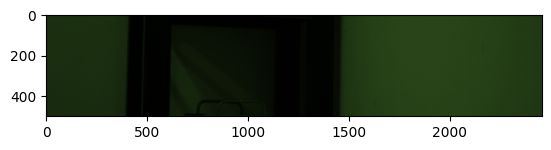

Lower =  0.0 Upper =  24
(500, 2456, 3)


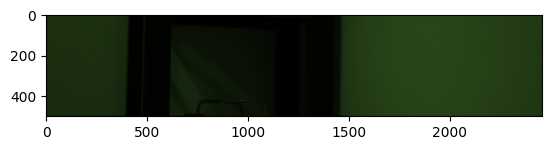

Lower =  20.0 Upper =  22
(500, 2456, 3)


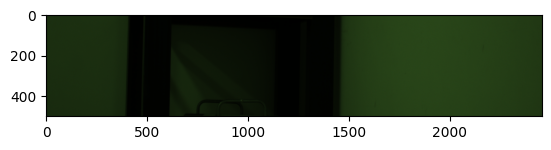

Lower =  20.0 Upper =  24
(500, 2456, 3)


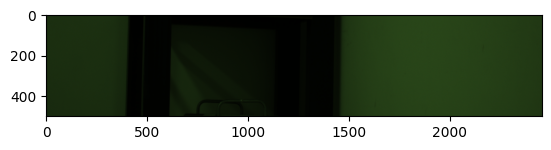

In [16]:
cam.Open()
for lower in [0.0, 20.0]:
    for upper in [22, 24]:
        print("Lower = ", lower, "Upper = ", upper)
        cam.AutoGainLowerLimit.SetValue(lower)
        cam.AutoGainUpperLimit.SetValue(upper)
        cam.StartGrabbing()
        with cam.RetrieveResult(2000) as result:
                if result.GrabSucceeded():
                    frame = result.GetArray()
#                    frame = cv2.cvtColor(frame, cv2.COLOR_BayerRG2RGB)
                    print(np.shape(frame))
                    plt.imshow(frame)
                    plt.show()
                    sleep(0.1)
                else:
                    print("GrabFailed")        
        cam.StopGrabbing()
cam.AutoGainLowerLimit.SetValue(0.0)
cam.AutoGainUpperLimit.SetValue(24.0)
cam.Close()


### Auto White Balance

The camera compares the average gray values of the red, green, and blue pixels. It determines the color with the highest average gray value (i.e., the brightest color) and sets the BalanceRatio parameter value for this color to 1.

We just enable this to "once".

In [17]:
cam.Open()
cam.BalanceWhiteAuto.SetValue("Once")# "Once" "Continous" and "Off"
cam.Close()

### Light Source Preset

The Light Source Preset camera feature allows you to correct color shifts caused by certain light sources.

available sources are:

1. Daylight5000K
2. Daylight6500K
3. FactoryLED6000K
4. Fluorescent4000K
5. MicroscopeLED4500K
6. MicroscopeLED5500K
7. MicroscopeLED6000K
8. Tungsten2800K
9. Off



LightSource Daylight5000K
(500, 2456, 3)


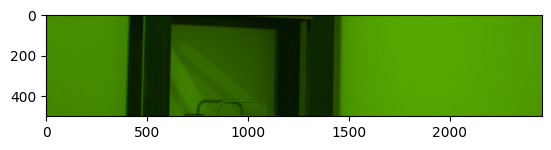

LightSource Daylight6500K
(500, 2456, 3)


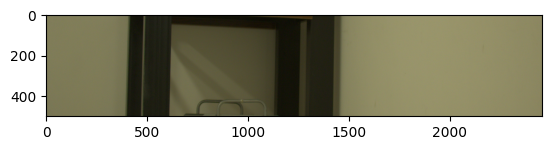

LightSource Tungsten2800K
(500, 2456, 3)


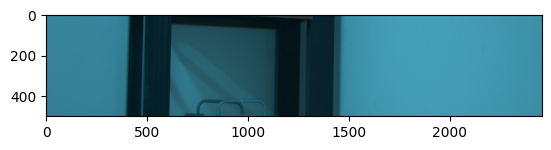

LightSource Off
(500, 2456, 3)


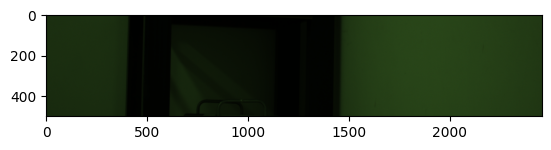

In [18]:
cam.StopGrabbing()
cam.Close()
L_Sorce = ["Daylight5000K",
"Daylight6500K",
#"FactoryLED6000K",not available
#"Fluorescent4000K",
#"MicroscopeLED4500K",
#"MicroscopeLED5500K",
#"MicroscopeLED6000K",
"Tungsten2800K",
"Off"]
Parameter = "LightSource"
cam.Open()
for prm in L_Sorce:
    print(Parameter, prm)
    cam.LightSourcePreset.SetValue(prm)
    cam.StartGrabbing()
    with cam.RetrieveResult(2000) as result:
            if result.GrabSucceeded():
                frame = result.GetArray()
#                frame = cv2.cvtColor(frame, cv2.COLOR_BayerRG2RGB)
                print(np.shape(frame))
                plt.imshow(frame)
                plt.show()
                sleep(0.1)
            else:
                print("GrabFailed")        
    cam.StopGrabbing()
cam.LightSourcePreset.SetValue("Off")
cam.Close()


### Frame Size
The Image ROI camera feature allows you to specify the part of the sensor array that you want to use for image acquisition.


1. Make sure the camera is idle, i.e., not capturing images.
2. If you are using an ace Classic/U/L camera, set the CenterX and CenterY parameters to false.
Use the following parameters to specify the size of the image ROI:

Width
Height

3. Use the following parameters to specify the position of the image ROI:

OffsetX
OffsetY

(500, 2456, 3)


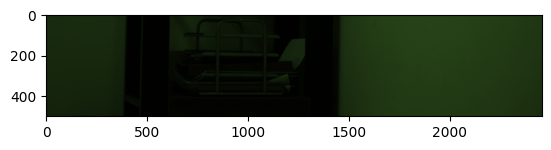

(500, 2464, 3)


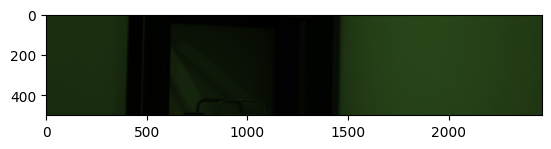

In [19]:
cam.StopGrabbing()
cam.Close()
cam.Open()
maxWidth = cam.WidthMax.GetValue()#maximum width
maxHeight = cam.HeightMax.GetValue()


cam.Width.SetValue(2456)
cam.Height.SetValue(500)
cam.OffsetX.SetValue(0)
cam.OffsetY.SetValue(1200)
cam.StartGrabbing()
with cam.RetrieveResult(2000) as result:
        if result.GrabSucceeded():
            frame = result.GetArray()
#            frame = cv2.cvtColor(frame, cv2.COLOR_BayerRG2RGB)
            print(np.shape(frame))
            plt.imshow(frame)
            plt.show()
            sleep(0.1)
        else:
            print("GrabFailed")        
cam.StopGrabbing()

cam.Close()
cam.Open()
cam.OffsetX.SetValue(0)
cam.OffsetY.SetValue(0)

cam.Width.SetValue(maxWidth)
cam.Height.SetValue(maxHeight)

cam.Width.SetValue(maxWidth)
cam.Height.SetValue(500)
cam.OffsetX.SetValue(0)
cam.OffsetY.SetValue(800)

cam.StartGrabbing()
with cam.RetrieveResult(2000) as result:
        if result.GrabSucceeded():
            frame = result.GetArray()
#            frame = cv2.cvtColor(frame, cv2.COLOR_BayerRG2RGB)
            print(np.shape(frame))
            plt.imshow(frame)
            plt.show()
            sleep(0.1)
        else:
            print("GrabFailed")        
cam.StopGrabbing()

#cam.OffsetX.SetValue(0)
#cam.OffsetY.SetValue(0)
#cam.Width.SetValue(maxWidth)
#cam.Height.SetValue(maxHeight)
#cam.OffsetX.SetValue(0)
#cam.OffsetY.SetValue(0)

cam.Close()







In [20]:
cam.StopGrabbing()
cam.Close()